In [1]:
#Misc
import scipy.io as sio
import os #to access files from the directories
import math
import time #to check total time took for running the script or function

#Visualization
import matplotlib.pyplot as plt

#Analysis
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import permutation_test_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
from sklearn.naive_bayes import GaussianNB
from sklearn import tree


In [6]:
dataFolder =  "imp/Data/"
columns = ["means","label"]
#df = pd.DataFrame({'A':1,'B':2}, index = None)
data_list = []
for matFile in os.listdir(dataFolder):
    if matFile.startswith("Faces") and not matFile.endswith("389.mat"):
        data = sio.loadmat(dataFolder + matFile)
        for i in range (len(data["means"])):
        #data_list.append(list(zip(data["means"],data["label"][0]))) # Check this how to do it
            d = data["means"][i],data["label"][0][i]
            data_list.append(d)
df = pd.DataFrame(data_list, columns = columns)
RoiNames = (data["RoiName"][:,0])
colRoi = []
for roi in RoiNames:
    colRoi.append(roi[0])
df[colRoi] = pd.DataFrame(df.means.values.tolist(), index = df.index)
df.drop(['means'], axis=1, inplace=True)

In [20]:
#Extracting different labels entries
df1 = df[df.label == 1]
df2 = df[df.label == 2]
df3 = df[df.label == 3]

In [31]:
#Combining two pairs off all combination
df12 = shuffle(df1.append(df2))
df23 = shuffle(df2.append(df3))
df31 = shuffle(df3.append(df1))


In [72]:

np.where(np.asanyarray(np.isnan(df12)))
df12.iloc[3,94]
#df12.columns[3]
#df12.loc[94,'Frontal_Sup_L']
#print(df12.iloc[3])
#print(df12.columns[94])
#print(df12.loc[4,'Cerebelum_Crus2_R'])
#print(df12.iloc[np.where(np.asanyarray(np.isnan(df12)))])
#print(df12.iloc[564,94])
df12 = df12[df12.label == 1].fillna(df12[df12.label == 1].mean())
np.where(np.asanyarray(np.isnan(df12)))

(array([], dtype=int64), array([], dtype=int64))

In [111]:
df = pd.DataFrame(np.random.randn(5,3))
df.iloc[3:5,0] = np.nan
l = pd.DataFrame({"label":[1,2,1,2,1]})
df = df.join(l)
print(df.mean())
df

0        0.162374
1        0.423409
2       -0.492583
label    1.400000
dtype: float64


,0,1,2,label
0,-0.822863,-0.093227,-0.542361,1
1,0.843451,1.092914,0.059234,2
2,0.466534,-0.513364,-1.439684,1
3,NaN,0.295200,-0.018071,2
4,NaN,1.335522,-0.522031,1


In [119]:
#Mean replacement for nan numbers in particular label with the mean of non missing values in the same label.
tdf = pd.DataFrame(columns=df.columns)
for l in df.label.unique():
    tdf = tdf.append(df[df.label == l].fillna(df[df.label == l].mean()))
    
tdf

,0,1,2,label
0,-0.822863,-0.093227,-0.542361,1
2,0.466534,-0.513364,-1.439684,1
4,-0.178164,1.335522,-0.522031,1
1,0.843451,1.092914,0.059234,2
3,0.843451,0.295200,-0.018071,2


In [114]:

print(df[df.label == 1].mean())
print(df[df.label == 2].mean())
df1 = df[df.label == 1].fillna(df[df.label == 1].mean()) 
df2 = df[df.label == 2].fillna(df[df.label == 2].mean()) 
df = df1.append(df2)
df

0       -0.178164
1        0.242977
2       -0.834692
label    1.000000
dtype: float64
0        0.843451
1        0.694057
2        0.020582
label    2.000000
dtype: float64


,0,1,2,label
0,-0.822863,-0.093227,-0.542361,1
2,0.466534,-0.513364,-1.439684,1
4,-0.178164,1.335522,-0.522031,1
1,0.843451,1.092914,0.059234,2
3,0.843451,0.295200,-0.018071,2


In [4]:
s = "results_svm_train_123.json"
print(s.split(".")[0].split("_")[-2])

train


In [8]:
#!conda install statistics --yes
from statistics import mean
a= [1,2,3,4]
print(mean(a))

2.5


In [10]:
a = [0.36363636363636365,
        0.36363636363636365,
        0.6190476190476191,
        0.5714285714285714,
        0.3333333333333333,
        0.42857142857142855,
        0.47619047619047616,
        0.3,
        0.42105263157894735,
        0.2631578947368421]
print(mean(a))

0.414005468216


In [3]:
import scipy.io as sio
import pandas as pd
import numpy as np
def data_extraction(data_folder, nClass, mat_file = "Faces_con_0001.mat" ):
    """
    This function currently reads single contrast
    :param data_folder: Path to the folder that contains Data
    :return: df: When nClass=3 Single panda dataframe containing means of various Region of interest (ROI) of Brain of all the three classes combined
            df1, df2, df3: Separated dataframes for each class when nClass is 2
    """

    data = sio.loadmat(data_folder+"/" + mat_file)
    data_list = []
    for i in range(len(data["means"])):
        d = data["means"][i], data["label"][0][i]
        data_list.append(d)
    columns = ["means", "label"]
    df = pd.DataFrame(data_list, columns=columns)
    RoiNames = (data["RoiName"][:, 0])
    colRoi = []
    for roi in RoiNames:
        colRoi.append(roi[0])
    df[colRoi] = pd.DataFrame(df.means.values.tolist(), index=df.index)
    df.drop(['means'], axis=1, inplace=True)
    df["subject_cont"] = pd.DataFrame(np.transpose(data["subject_cont"]))

    print(df.shape)
    if nClass == 3: # No need for separated data
        return df

    elif nClass == 2:
        df1 = df[df.label == 1]
        df2 = df[df.label == 2]
        df3 = df[df.label == 3]
        return df1, df2, df3


In [5]:
df1 = data_extraction("Documents/TUB/Thesis/imp/Data",3, "Faces_con_0001.mat" )
df2 = data_extraction("Documents/TUB/Thesis/imp/Data",3,"Faces_con_0002.mat")
tdf = pd.DataFrame(columns=df1.columns)
for l in df1.label.unique():
    tdf = tdf.append(df1[df1.label == l].fillna(df1[df1.label == l].mean()))
df1 = tdf

tdf = pd.DataFrame(columns=df2.columns)
for l in df2.label.unique():
    tdf = tdf.append(df1[df2.label == l].fillna(df2[df2.label == l].mean()))
df2 = tdf

(259, 118)
(259, 118)


In [83]:
from sklearn import svm
from sklearn.utils import shuffle
import math

def train_test_split(df):
    """
    :param df: panda dataFrame which has means of ROIs
    :return: Training data set and testing dataset
    """

    df = shuffle(df)

    split_index = int(math.floor(0.8 * len(df)))
    train = df[:split_index]
    test = df[split_index:]

    return train, test
def get_features_labels(data):
    """
    :param data: pandas dataframe which has label, subject_cont and ROI mean values
    :return: X: Features and y: corresponding labels

    """
    data.drop('subject_cont', axis = 1, inplace=True)
    X = data.loc[:, data.columns != "label"].values
    y = np.asarray(data.label)

    return X,y

train, test = train_test_split(df1)
x_train, y_train = get_features_labels(train)
x_test, y_test = get_features_labels(test)
model = svm.SVC(kernel='rbf', C=4, gamma=2 ** -5)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
model.fit(x_train, y_train)
scores = model.score(x_train, y_train)
print(scores)
pred = model.predict(x_train)
overall_accuracy = sum(pred == y_train)/ len(y_train)
print(overall_accuracy)

test_score = model.score(x_test,y_test)
pred = model.predict(x_test)
print(len(y_test))
overall_accuracy_test = sum(pred == y_test)/float(len(y_test))
print(test_score)
print(overall_accuracy_test)

print(y_test)

label1  = list(map(lambda pred, y_test: pred == y_test & y_test == 1, pred,y_test))
label2  = list(map(lambda pred, y_test: pred == y_test & y_test == 2, pred,y_test))
label3  = list(map(lambda pred, y_test: pred == y_test & y_test == 3, pred,y_test))
#print(sum(pred == y_test & y_test == 1))
print(len(y_test))

print(sum(y_test == 1))
print(sum(label1))
print(sum(y_test == 2))
print(sum(label2))
print(sum(y_test == 3))
print(sum(label3))

overall_accuracy = (sum(label1) + sum(label2) + sum(label3))\
                   /(float(sum(y_test == 1) + sum(y_test == 2) + sum(y_test == 3)))
print(overall_accuracy)

balanced_accuracy = ((sum(label1) / float(sum(y_test == 1))) + \
                    (sum(label2) / float(sum(y_test == 2))) +\
                    (sum(label3) / float(sum(y_test == 3)))) / 3

print(balanced_accuracy)

1.0


1
52
0.384615384615
0.384615384615
[3 3 1 2 1 1 2 2 3 1 2 2 1 1 1 3 1 2 3 3 3 1 1 3 1 2 3 3 2 2 1 2 2 1 3 3 3
 1 2 3 2 1 2 3 2 1 3 3 2 2 2 2]
52
16
7
19
7
17
6
0.384615384615
0.386287409701


In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

roi_len = len(df1.columns) - 2 # not considering label and subject_cont 

for j in range(roi_len / 4):
    
    #fig, axes = plt.subplots(nrows=2, ncols=2)
    #axs = axes.ravel()
    
    for i in range(4):
        f = df1.iloc[:,(4*j) + i + 1]
        #print(j)
        #sns.distplot(f, ax = axs[i])
        
    #plt.show()

89
85


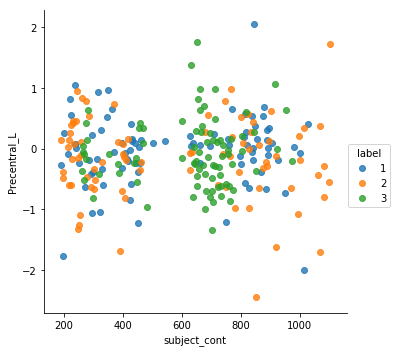

In [10]:
from itertools import cycle
color_gen = cycle(('blue', 'lightgreen', 'red', 'purple', 'gray', 'cyan'))
x = df1[df1["label"] == 1].iloc[:, 1]
y = df1[df1["label"] == 2].iloc[:, 1]
#plt.scatter(x , y, c=next(color_gen))
#plt.show()
print(x.size)
print(y.size)
#sns.regplot(x=df1.iloc[:,1], y=df1.iloc[:,2], fit_reg=False)
sns.lmplot( x="subject_cont", y="Precentral_L", data=df1, fit_reg=False, hue='label', legend=True)



In [11]:
#df3 = df1.loc[:,1,2,3]

#sns.pairplot(df1.loc[:, df1.columns != "subject_cont"], kind="scatter", hue="label", markers=["o", "s", "D"], "
# palette="Set2")ll
#plot.show()


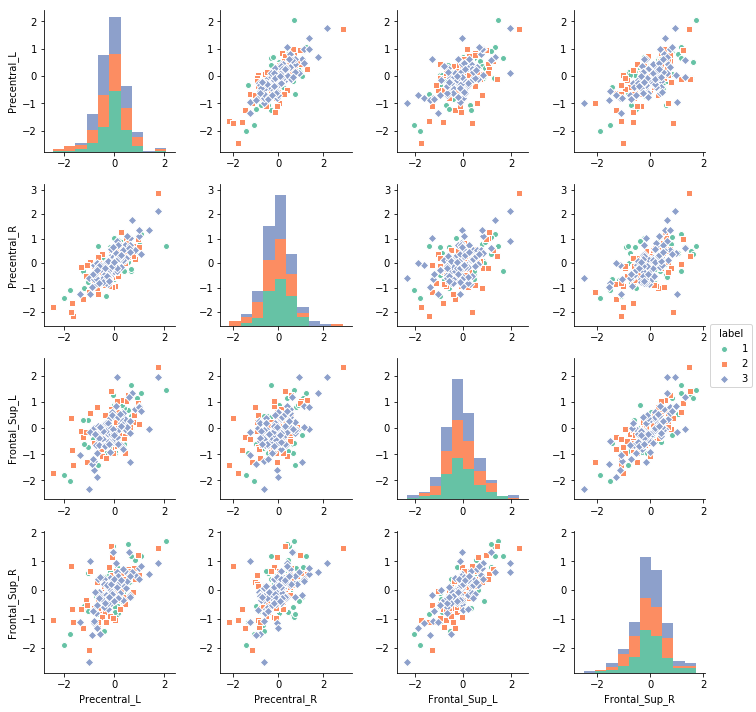

In [12]:

df3 = df1.iloc[:,[1,2,3,4]]
df3 = df3.join(df1.iloc[:,0])
sns.pairplot(df3, kind="scatter", hue="label", markers=["o", "s", "D"], vars=["Precentral_L","Precentral_R","Frontal_Sup_L", 
                                                                              "Frontal_Sup_R"],palette="Set2")
plt.show()




IOError: [Errno 2] No such file or directory: 'out/data_explore/correl_0.png'

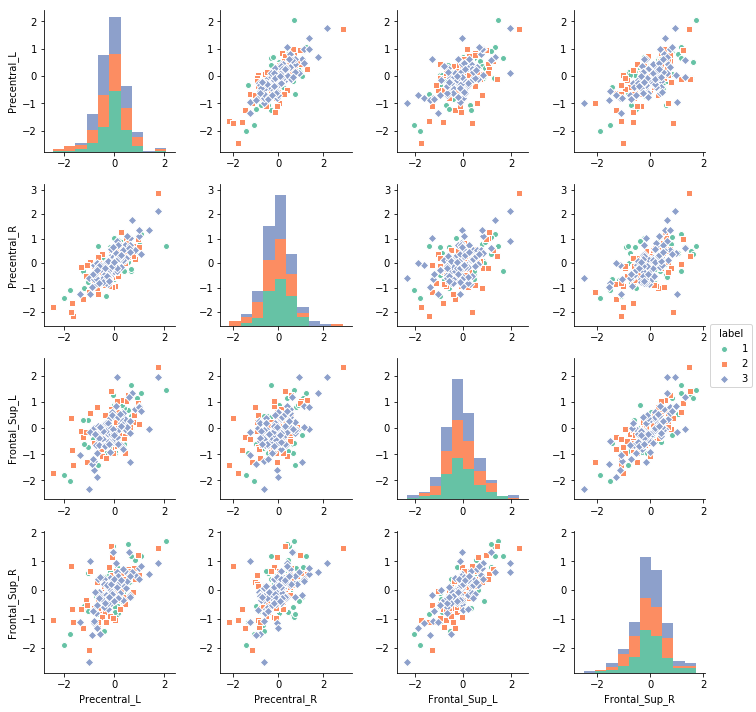

In [30]:

roi = df1[df1.columns[1:116]].columns

for i in range(0,16,4):

    if i+4 < 16:
        sns.pairplot(df1, kind="scatter", hue="label", markers=["o", "s", "D"], vars=roi[i:i+4],palette="Set2")
        plt.savefig("out/data_explore/correl_%s.png"%(i))

In [25]:
import itertools
a = ["a","b","c","d"]
print(list(itertools.permutations(a,2)))


[('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'a'), ('b', 'c'), ('b', 'd'), ('c', 'a'), ('c', 'b'), ('c', 'd'), ('d', 'a'), ('d', 'b'), ('d', 'c')]


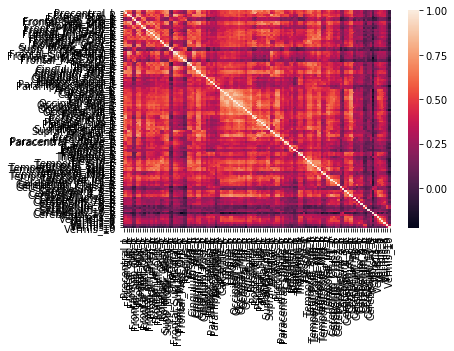

In [10]:
import seaborn as sns
corr = df1.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


In [7]:
contrast_list = ["Faces_con_0001.mat",'Faces_con_0001_389.mat','nBack_con_0001.mat','nBack_con_0001_407.mat' ]

for i in range(0, len(contrast_list),2):
    contrast_name = contrast_list[i].split(".")[0]
    for nClass in range(2,4,1):
        if nClass == 3:
            if True:
                    print(contrast_list[i], contrast_list[i+1])
        elif nClass == 2:
            if True:
                    print(contrast_list[i], contrast_list[i + 1])
        print(i) 

        

('Faces_con_0001.mat', 'Faces_con_0001_389.mat')
0
('Faces_con_0001.mat', 'Faces_con_0001_389.mat')
0
('nBack_con_0001.mat', 'nBack_con_0001_407.mat')
2
('nBack_con_0001.mat', 'nBack_con_0001_407.mat')
2
